In [45]:
%load_ext autoreload
%autoreload 2

import plotter
import analysis
import lmpsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Summary

This week is mainly a "testing" week, where we want to review different techniques used by other that are to be used in the future :

**1. HPS-T Model** : Check if we can reproduce the CspTm and Integrase radius' of gyration from the Dignon paper.


**2. Slab method** : Implement a simple slab method on LAMMPS, and performance


**3. Contacts** : Check if we can reproduce the contact map from the LAF-1-RGG protein also from a Dignon paper


**4. Tc of CPEB4's** : Check if we can get the critical temperature for all constructs for an expanded temperature range (at CSUC)


**5. Giulio's approach to HPS** : Test how much the results differ


**6. Giulio's proteins** : Simulate the proteins form Table 8

In [46]:
p = plotter.Plotter()
p.index

,Protein,I,Eps,Scale,Name,FullPath
0,HPS-T,100,80.0,0.08,T0,/home/adria/data/prod/lammps/HPS-T/CspTm/T0
1,HPS-T,100,80.0,1.11,T1,/home/adria/data/prod/lammps/HPS-T/CspTm/T1
2,HPS-T,93,80.0,1.80,T2,/home/adria/data/prod/lammps/HPS-T/CspTm/T2
3,HPS-T,86,80.0,2.14,T3,/home/adria/data/prod/lammps/HPS-T/CspTm/T3
4,HPS-T,80,80.0,2.14,T4,/home/adria/data/prod/lammps/HPS-T/CspTm/T4
5,HPS-T,75,80.0,1.79,T5,/home/adria/data/prod/lammps/HPS-T/CspTm/T5
6,HPS-T,67,80.0,0.07,T6,/home/adria/data/prod/lammps/HPS-T/CspTm/T6
7,HPS-T,100,80.0,0.08,T0,/home/adria/data/prod/lammps/HPS-T/Integrase/T0
8,HPS-T,100,80.0,1.11,T1,/home/adria/data/prod/lammps/HPS-T/Integrase/T1
9,HPS-T,93,80.0,1.80,T2,/home/adria/data/prod/lammps/HPS-T/Integrase/T2


### 1. HPS-T Model

Just a pretty direct implementation for the HPS-T model for 2 proteins discussed on the paper where the model is presented (**CspTm**, **integrase**):

**CspTm**

> Run Completed at 100.00% for CspTm. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
(7, 1000)


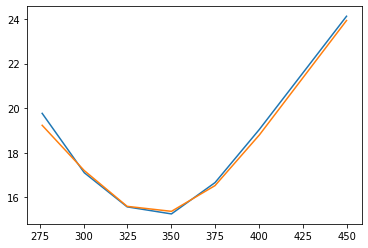

In [57]:
rg_T = []
rg = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/HPS-T/CspTmV2').rg()
print(rg.shape)
rg_exp = np.genfromtxt('/home/adria/documents/csp.txt')
plt.plot(rg_exp[:,0], rg.mean(axis=1))
plt.plot(rg_exp[:,0], rg_exp[:,1]*10, '-')

**Integrase**

> Run Completed at 100.00% for Integrase. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for Integrase. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for Integrase. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for Integrase. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for Integrase. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for Integrase. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100

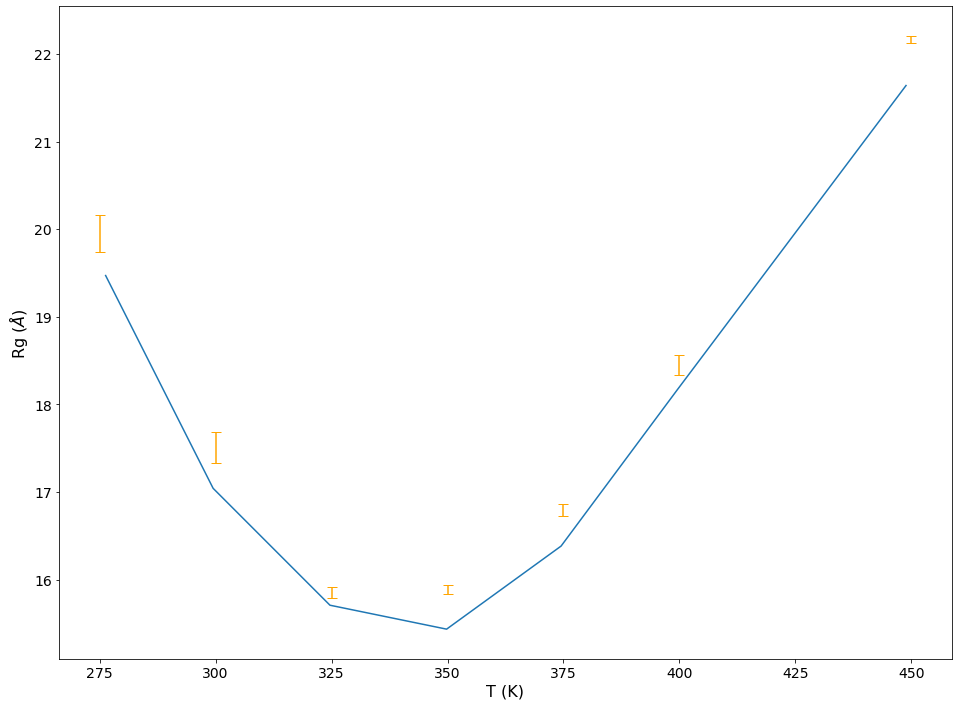

In [44]:
p.clean()
rg_T = []
rg_T.append(p.plot(observable='rg', index=25, plot_id=0, color='red'));
rg_T.append(p.plot(observable='rg', index=26, plot_id=0, color='red'));
rg_T.append(p.plot(observable='rg', index=27, plot_id=0, color='red'));
rg_T.append(p.plot(observable='rg', index=28, plot_id=0, color='red'));
rg_T.append(p.plot(observable='rg', index=29, plot_id=0, color='orange'));
rg_T.append(p.plot(observable='rg', index=30, plot_id=0, color='orange'));
rg_T.append(p.plot(observable='rg', index=31, plot_id=0, color='orange'));

rg_exp = np.genfromtxt('/home/adria/documents/integrase.txt')
p.axis.plot(rg_exp[:,0], rg_exp[:,1]*10, '-')

### 2. Slab Method

A first test (not too good), showed that slab contraction can be achieved in LAMMPS :

<img src="img/slab.gif" style="width: 300px;">

About performance, for a slab like the one on top, the number of timesteps per second was low, even when comparing to CSUC :


    - At perdiu : 197 ts/s
    
    - At CSUC : 238 ts/s
   
It remains to compare other optimizations possible to LAMMPS. It is possible that the box length also affect the performance of the system, although this is not expected due to the use of implicit solvent. To do so, I simulated 50 chains in a box adjusted to a minimal volume and another adjusted to a much bigger one :

    - Box (Small), L = 1600 A : 19.433 ts/s
    
    - Box (Big), L = 5000 A : 16.567 ts/s

Let's do some convergence tests, for **CPEB4_D4** for example, which converges really slowly :

In [43]:
slab_d4 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/PERFORMANCE/SLAB',
                           chains = 60,
                           temper = False,
                           protein='CPEB4_D4',
                           slab=True)
slab_d4.t = 10000000
slab_d4.slab_t = 10000
slab_d4.save = 50000
slab_d4.processors = 4
slab_d4 = slab_d4.write_hps_files(qsub=False, silent=True)

### 3. Contacts

We wish to reproduce the contact map shown by Dignon on LAF1 : 

<img src="img/LAF1-RGG.png" style="width: 500px;">

In [3]:
laf1 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CONTACT-TEST', max_frames=5)
contacts = laf1.inter_distance_map(contacts=True, temperature=0)

> Run Completed at 100.00% for LAF-1_RGG. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 5 to avoid strong correlations


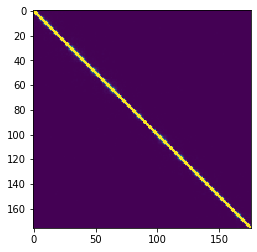

In [7]:
plt.imshow(contacts[0][0])
plt.imshow(contacts[1][0])

Not good...

### 4. Tc of CPEB4's

It seems that droplets are not being formed at any temperatures ?

### 5. gHPS

In [62]:
gCPEB4 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/GIULIO-TEST')
rg_giulio = gCPEB4.rg()

> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


In [63]:
CPEB4 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4/x1/1.0ls-100I-80e')
rg_hps = CPEB4.rg()

> Run Completed at 83.78% for CPEB4. Ran 83785000 steps for a total of 16758 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


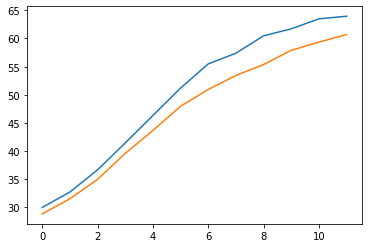

In [68]:
plt.plot(rg_giulio.mean(axis=1), label='gHPS')
plt.plot(rg_hps.mean(axis=1), label='HPS')

### 6. Giulio's proteins : Simulate the proteins form Table 8

Disk space went full mid simulations, so some trajectories can be corrupted. Also, only trajectories are given to Giulio, so all we're checking here is that dcd trajectories can be successfully loaded using mdtraj, and that the correlation is low enough

In [30]:
import statsmodels.tsa.stattools
import mdtraj as md

**OPN220**

> Run Completed at 100.00% for OPN220. Ran 1000000000 steps for a total of 19944 frames 
> Taking frames every 2 for a total of 2000 to avoid strong correlations


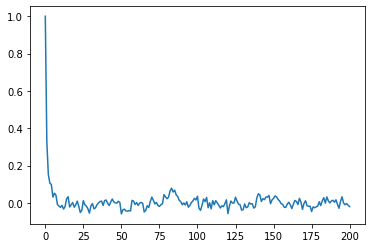

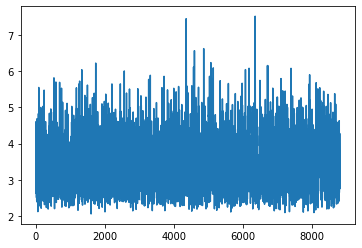

In [32]:
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/OPN220', max_frames=2000).rg()
plt.plot(statsmodels.tsa.stattools.acf(rg[0, :], nlags=200, fft=False))
plt.figure()
tr = md.load('/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/OPN220/dcd_traj.dcd', top='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/OPN220/topo.pdb')
rg = md.compute_rg(tr, masses=None)
plt.plot(rg)

**FUSLC**

> Run Completed at 100.00% for FUSLC. Ran 1000000000 steps for a total of 19738 frames 
> Taking frames every 2 for a total of 2000 to avoid strong correlations


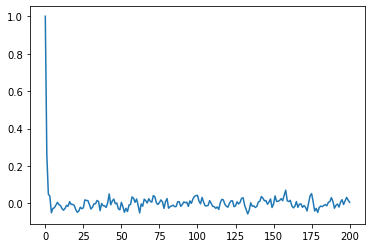

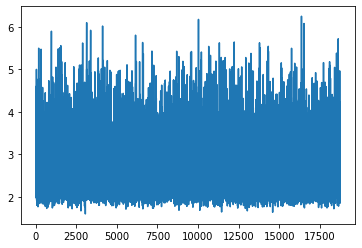

In [37]:
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/FUSLC', max_frames=2000).rg()
plt.plot(statsmodels.tsa.stattools.acf(rg[0, :], nlags=200, fft=False))
plt.figure()
tr = md.load('/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/FUSLC/dcd_traj.dcd', top='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/FUSLC/topo.pdb')
rg = md.compute_rg(tr, masses=None)
plt.plot(rg)

**FUS12ELC**

> Run Completed at 100.00% for FUS12ELC. Ran 1000000000 steps for a total of 19847 frames 
> Taking frames every 2 for a total of 2000 to avoid strong correlations


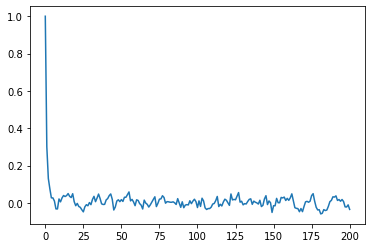

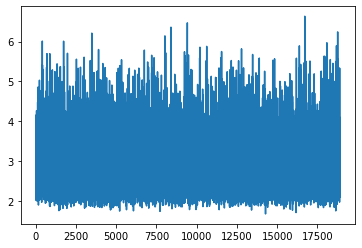

In [39]:
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/FUS12ELC', max_frames=2000).rg()
plt.plot(statsmodels.tsa.stattools.acf(rg[0, :], nlags=200, fft=False))
plt.figure()
tr = md.load('/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/FUS12ELC/dcd_traj.dcd', top='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/FUS12ELC/topo.pdb')
rg = md.compute_rg(tr, masses=None)
plt.plot(rg)

**SIC1**

> Run Completed at 100.00% for SIC1. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 2000 to avoid strong correlations


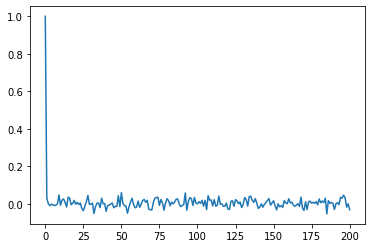

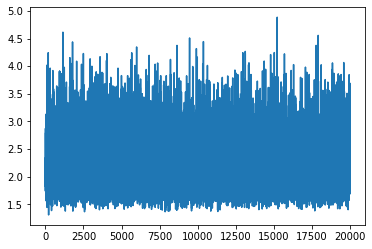

In [40]:
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/SIC1', max_frames=2000).rg()
plt.plot(statsmodels.tsa.stattools.acf(rg[0, :], nlags=200, fft=False))
plt.figure()
tr = md.load('/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/SIC1/dcd_traj.dcd', top='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/SIC1/topo.pdb')
rg = md.compute_rg(tr, masses=None)
plt.plot(rg)

**BASP1**

> Run Completed at 100.00% for OPN220. Ran 1000000000 steps for a total of 19944 frames 
> Taking frames every 2 for a total of 2000 to avoid strong correlations


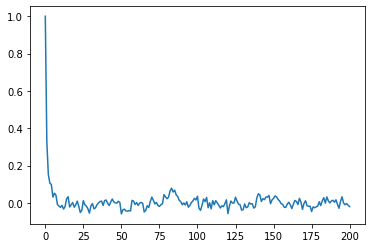

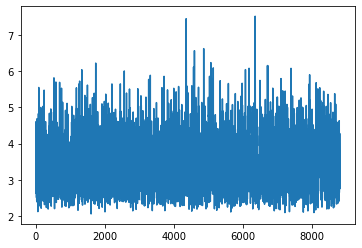

In [41]:
rg = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/OPN220', max_frames=2000).rg()
plt.plot(statsmodels.tsa.stattools.acf(rg[0, :], nlags=200, fft=False))
plt.figure()
tr = md.load('/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/OPN220/dcd_traj.dcd', top='/home/adria/perdiux/prod/lammps/dignon/GiulioProteins/OPN220/topo.pdb')
rg = md.compute_rg(tr, masses=None)
plt.plot(rg)